# CIFAR 100

## Import Libraries

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras 
from keras.layers import Dense

## Import Datasets

In [102]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')

$ x_train: (50000, 32, 32, 3)
$ y_train: (50000, 1)
$ x_test: (10000, 32, 32, 3)
$ y_test: (10000, 1)


## Image Show

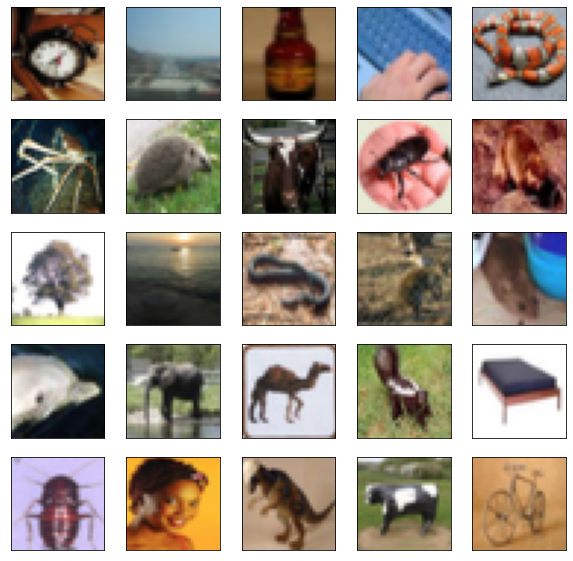

In [103]:
plt.figure(figsize=(10,10))
for idx, img in enumerate(np.random.randint(0, 9999, 25)):
    plt.subplot(5, 5, idx+1)
    plt.imshow(x_train[img])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Process Data

### Normalize Data

In [104]:
x_train, x_test = x_train/255, x_test/255

### Reshape Data

In [105]:
dim2 = 32*32*3
x_train = x_train.reshape(len(x_train), dim2)
x_test = x_test.reshape(len(x_test), dim2)

## Initialize Variables

### One-Hot Encoding

In [106]:
# One-hot Encoding
y_test = pd.get_dummies(i for i in y_test.T[0])
y_train = pd.get_dummies(i for i in y_train.T[0])

### Weight && Bias

In [107]:
W = np.full((3072, 1), 0.0)
b = np.full((100, 1), 0.0)

### Hyperparameter

In [108]:
learning_rate = 0.001
batch_size = 500
epochs = 100

## Build Model

In [109]:
model = keras.Sequential()

### Add Layers

In [110]:
print(f'$ x_train: {x_train.shape}')
print(f'$ y_train: {y_train.shape}')
print(f'$ x_test: {x_test.shape}')
print(f'$ y_test: {y_test.shape}')

$ x_train: (50000, 3072)
$ y_train: (50000, 100)
$ x_test: (10000, 3072)
$ y_test: (10000, 100)


#### ReLU

In [111]:
model.add(Dense(1536, activation='relu', input_shape=(3072, )))
model.add(Dense(768, activation='relu', input_shape=(1536, )))
model.add(Dense(512, activation='relu', input_shape=(512, )))
model.add(Dense(512, activation='relu', input_shape=(512, )))
model.add(Dense(512, activation='relu', input_shape=(512, )))
model.add(Dense(256, activation='relu', input_shape=(512, )))
model.add(Dense(128, activation='relu', input_shape=(256, )))

#### Softmax

In [112]:
model.add(Dense(100, activation='softmax'))

In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 1536)              4720128   
                                                                 
 dense_88 (Dense)            (None, 768)               1180416   
                                                                 
 dense_89 (Dense)            (None, 512)               393728    
                                                                 
 dense_90 (Dense)            (None, 512)               262656    
                                                                 
 dense_91 (Dense)            (None, 512)               262656    
                                                                 
 dense_92 (Dense)            (None, 256)               131328    
                                                                 
 dense_93 (Dense)            (None, 128)              

### Model Compile

In [114]:
adam = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Train

In [115]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
100/100 [==============================] - 7s 66ms/step - loss: 4.4479 - accuracy: 0.0266
Epoch 2/100
100/100 [==============================] - 7s 67ms/step - loss: 4.0504 - accuracy: 0.0679
Epoch 3/100
100/100 [==============================] - 6s 65ms/step - loss: 3.9397 - accuracy: 0.0858
Epoch 4/100
100/100 [==============================] - 6s 64ms/step - loss: 3.8255 - accuracy: 0.1041
Epoch 5/100
100/100 [==============================] - 6s 64ms/step - loss: 3.7112 - accuracy: 0.1258
Epoch 6/100
100/100 [==============================] - 6s 65ms/step - loss: 3.6006 - accuracy: 0.1426
Epoch 7/100
100/100 [==============================] - 7s 74ms/step - loss: 3.5057 - accuracy: 0.1630
Epoch 8/100
100/100 [==============================] - 8s 78ms/step - loss: 3.4177 - accuracy: 0.1775
Epoch 9/100
100/100 [==============================] - 7s 65ms/step - loss: 3.3514 - accuracy: 0.1897
Epoch 10/100
100/100 [==============================] - 7s 69ms/step - loss: 3.285

## Predict

In [116]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 8ms/step


## Test

In [117]:
count = 0

for idx, i in enumerate(pred):
    if np.argmax(y_test.T[idx]) == np.argmax(i):
        count += 1

In [118]:
print(count)

2032
